## Importing Libraries

In [1]:
from keras.datasets import mnist
from keras import layers, models
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

## Loading dataset 

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
train_data.shape

(60000, 28, 28)

In [4]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<function matplotlib.pyplot.show(close=None, block=None)>

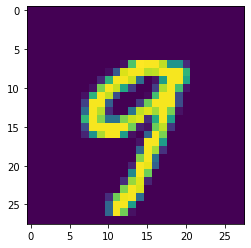

In [5]:
plt.imshow(train_data[45])
plt.show

In [6]:
train_labels[45]

9

## Creando un modelo de datos

In [7]:
# Neural Networks Sequential model
model = models.Sequential()
# Let's add layers & it's neural length
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
# Let add a new layer but with 10 neurons
model.add(layers.Dense(10,activation='softmax'))

In [8]:
# Let's set an optimizator
model.compile(optimizer='rmsprop',
              # A loss function
              loss='categorical_crossentropy',
              # Success's Metrics
              metrics=['accuracy'])

## Limpieza de datos

In [9]:
# Starting with training data & change its shape - Easier to deal with 2 dimensions rather than 3
x_train = train_data.reshape((60000,28*28))
# let's convert it into float numbers
x_train = x_train.astype('float32')/255

# Similar procedure with test data
x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [11]:
# Let's perform a one-hot encoding over "y" labels
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
train_labels[0]

5

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Entrenando el modelo

In [12]:
# Let's train & adjust the net 
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 3ms/step - loss: 0.2615 - accuracy: 0.9254
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1074 - accuracy: 0.9683
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0706 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0515 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0381 - accuracy: 0.9889


## Evaluando sobre data de test

In [ ]:
# Let check a Net Model performance
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0722 - accuracy: 0.9786


[0.07223645597696304, 0.978600025177002]